1. Load the file from directory.
2. Sort by the access amount
3. Generate one single plot with color bar
4. Combine the subfigures into one

In [35]:
import glob
def find_source_file(source_dir):
    log_files = [filename for filename in glob.glob(
                source_dir+"/**") if "distribution" in filename]
    
    return log_files

source_files = find_source_file("Resources/File_Caching_Plotter")

print(source_files)

source_files.sort() # add your own sort methods here, or, you can push back every single file into this array

['Resources/File_Caching_Plotter/earth_size_distribution.txt', 'Resources/File_Caching_Plotter/zombie_size_distribution.txt', 'Resources/File_Caching_Plotter/candycrash_size_distribution.txt', 'Resources/File_Caching_Plotter/Twitter_size_distribution.txt', 'Resources/File_Caching_Plotter/youtube_size_distribution.txt', 'Resources/File_Caching_Plotter/Map_size_distribution.txt', 'Resources/File_Caching_Plotter/firefox_size_distribution.txt', 'Resources/File_Caching_Plotter/TikTok_size_distribution.txt', 'Resources/File_Caching_Plotter/Chrome_size_distribution.txt', 'Resources/File_Caching_Plotter/facebook_size_distribution.txt']


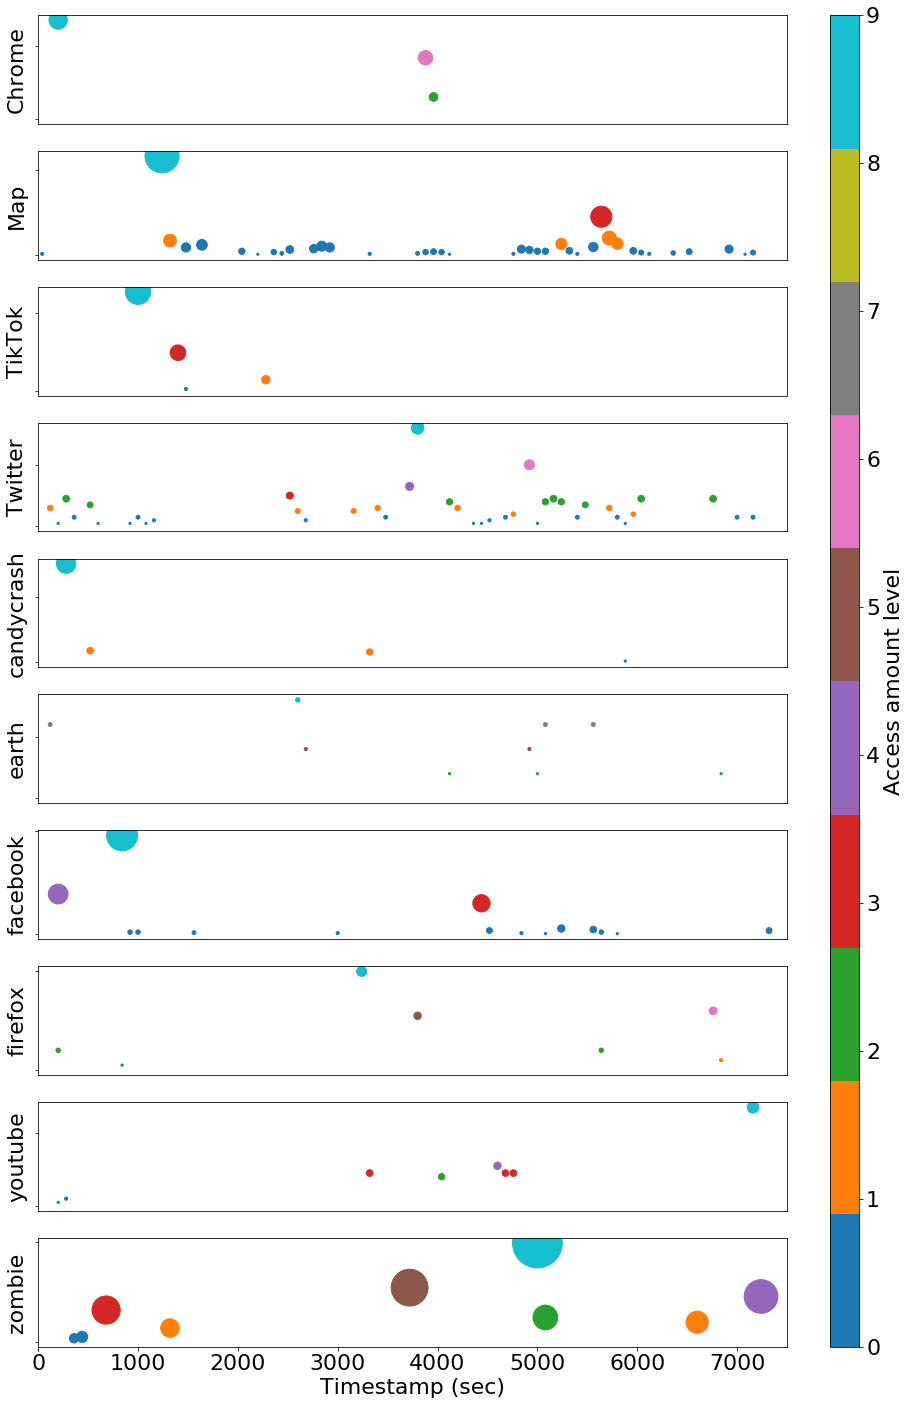

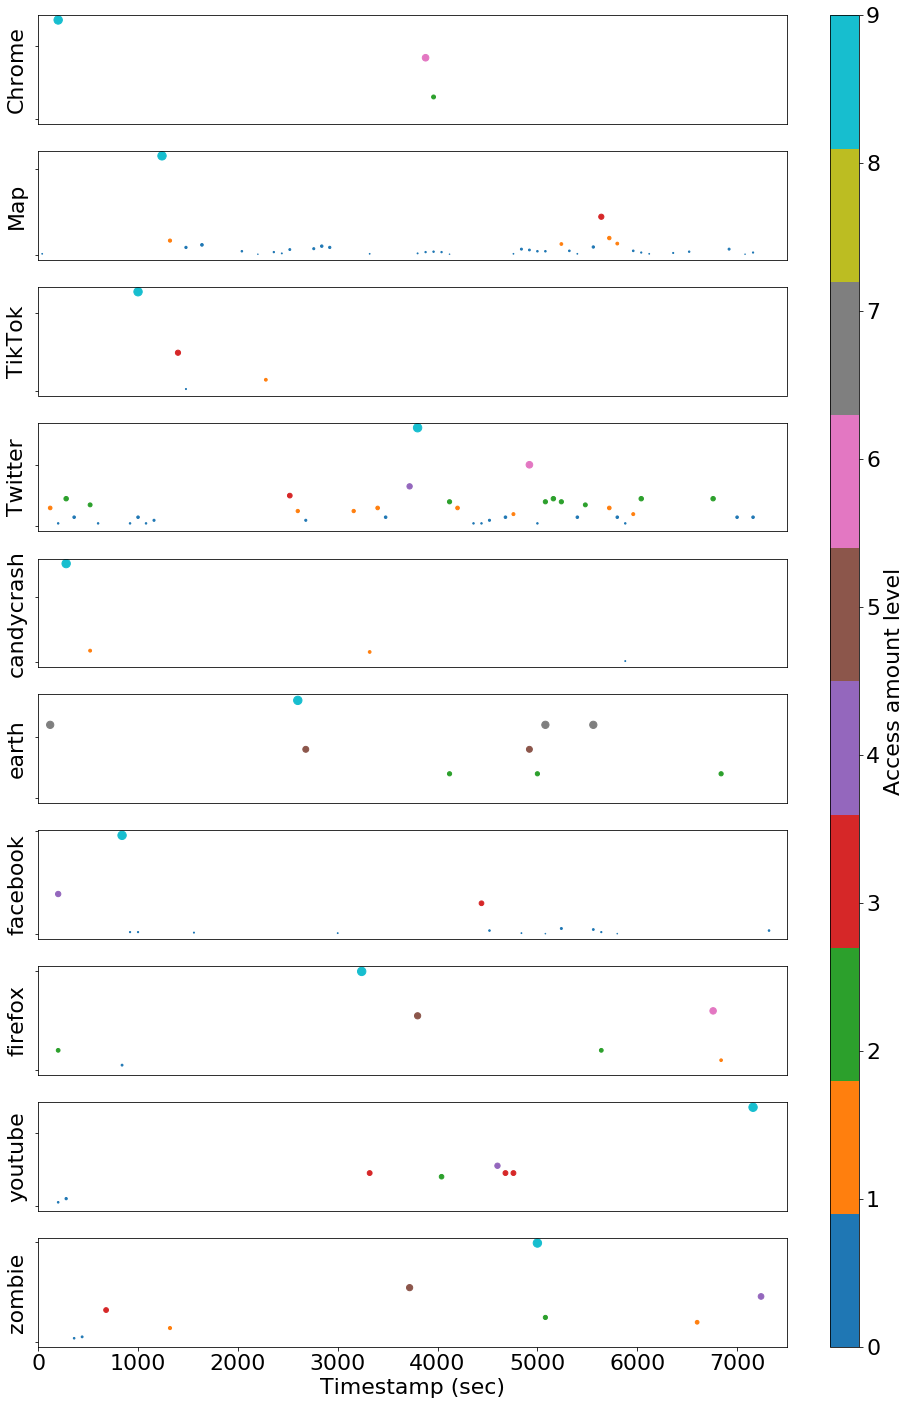

In [39]:
# here is the scattering logic

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import matplotlib.ticker as ticker
import inspect

plt.rcParams.update({'font.size': 22})

MAX_TIMESTAMP = 7500
MAX_SIZE = 70
INIT_SIZE = 5

@ticker.FuncFormatter
def y_major_formatter(y,ps):
    return "%d" % y
@ticker.FuncFormatter
def yr_major_formatter(y,ps):
    return ""

def counter_transfer(inputX,gap=80):
    countedX=[]
    countedY=[]
    scale_array=[]
    scale_range = 1
    
    for i in range(int(MAX_TIMESTAMP/gap)):
        flag = int(i*gap + gap/2)
        hit = len([ n for n in inputX if i * gap < n < (i+1) * gap ])
        countedX.append(flag)
        countedY.append(hit)
        scale_array.append(hit * INIT_SIZE)
    
    scale_range = max(countedY) - min (countedY)
    if scale_range == 0:
        scale_range = 1
    return countedX,countedY,scale_array

def counter_transfer_size_uniformed(inputX,gap=80):
    countedX=[]
    countedY=[]
    scale_array=[]
    scale_range = 1
    
    for i in range(int(MAX_TIMESTAMP/gap)):
        flag = int(i*gap + gap/2)
        hit = len([ n for n in inputX if i * gap < n < (i+1) * gap ])
        countedX.append(flag)
        countedY.append(hit)
        scale_array.append(hit * MAX_SIZE)
    
    scale_range = max(countedY) - min (countedY)
    if scale_range == 0:
        scale_range = 1
    return countedX,countedY,[area / scale_range for area in scale_array]

def add_points_to_scatter(subfigure,src_file,cmp,plot_style,time_gap=80):
    file_content = open(src_file,"r").readlines()
    data_dict = {}
    keys = []
    for line in file_content:
        try:
            access_moment = float(line)
            data_dict[keys[-1]].append(access_moment)
        except:
            if line[0]!="=":
                data_dict[line]=[]
                keys.append(line)
    X = []
    Y = []
    access_level = 0
    for key in keys:
        for point in data_dict[key]:
            X.append(point)
            Y.append(access_level)
        access_level+=1
    
    x,y,s = plot_style(X,gap=time_gap)
    
    subfigure.scatter(x,y,c=y, s=s,
                          cmap=cmp)
    subfigure.yaxis.set_major_formatter(yr_major_formatter)
    subfigure.set_xlim(0,7500)
    subfigure.set_xticks([])
    app_name = src_file.split("/")[-1].split("_")[-3]
    subfigure.set_ylabel(app_name)
    return


bar_count = 10
bar_size = 5

def ploter(plot_style,cmap=mpl.cm.tab10,time_gap=80):
    fig = plt.figure(figsize=(16, 25)) # change the size of total figure here
    grid = plt.GridSpec(bar_size * bar_count,13,hspace=0,wspace=1.5) # If you really want to change this line, tell me first
    
    scatter_bars = []
    
    for i in range(bar_count):
        scatter_bar = fig.add_subplot(grid[i*bar_size:(i+1)*bar_size-1,1:12])
        scatter_bars.append(scatter_bar)
    
    processed_file = 0    
    
    color_bar = fig.add_subplot(grid[:-1,-1:])
    
    norm = mpl.colors.Normalize(vmin=0, vmax=9)
    
    cb1 = mpl.colorbar.ColorbarBase(color_bar, cmap=cmap,
                                    norm=norm,
                                    orientation='vertical')
    cb1.ax.yaxis.set_major_formatter(y_major_formatter)
    cb1.set_label('Access amount level')
    
    for single_scatter in scatter_bars:
        add_points_to_scatter(single_scatter,source_files[processed_file],cmap,plot_style,time_gap)
        processed_file+=1
    
    scatter_bars[-1].set_xlabel("Timestamp (sec)")
    _ = scatter_bars[-1].set_xticks(range(0,MAX_TIMESTAMP,1000))
    # fig.savefig(plot_style.__name__+"map_scatter_with_gap"+str(target_time_gap)+".pdf")
    
target_cmap = mpl.cm.tab10 # choose your favorite at https://matplotlib.org/3.2.0/tutorials/colors/colormaps.html
target_time_gap = 80
ploter(counter_transfer,target_cmap,target_time_gap)

ploter(counter_transfer_size_uniformed,target_cmap,target_time_gap)